<a href="https://colab.research.google.com/github/joaovictojuliao/Squad-2-M4/blob/aline---an%C3%A1lise-de-outlier%2C-conclus%C3%A3o-1%C2%AA-pergunta-extra%2C-9-e-10/M4_Squad_2_Projeto_Final_an%C3%A1lise_explorat%C3%B3ria_pre%C3%A7os_de_combust%C3%ADveis_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória dos Preços de Combustíveis no Brasil**

# **1. Introdução**

- Falar do objetivo e contexto da indústria dos combustíveis

Explicando como o preço dos combustíveis é formado
https://www.gov.br/anp/pt-br/assuntos/precos-e-defesa-da-concorrencia/precos/composicao-e-estruturas-de-formacao-dos-precos

# **2. Apresentando os dados originais**



### **2.1 - Importação e concatenação**
 

In [468]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [469]:
# Importando a biblioteca Pandas, Matplotlib, Seaborn e Numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [470]:
# Importando dados do mês de julho:

combustiveis_julho = pd.read_csv("/content/drive/MyDrive/Resilia - Módulo 4 - Projeto Final /CSV/precos-gasolina-etanol-07.csv", sep = ';')

# Importando dados do mês de agosto:

combustiveis_agosto = pd.read_csv("/content/drive/MyDrive/Resilia - Módulo 4 - Projeto Final /CSV/precos-gasolina-etanol-08.csv", sep=';')

In [471]:
#Criando um novo dataset com a junção das tabelas anteriores:

combustiveis = pd.concat([combustiveis_julho, combustiveis_agosto])

### **2.2 -  Conhencendo a estrutura geral dos dados**

In [472]:
# Identificando o formato do dataset original
# O output retorna a quantidade de linhas e colunas, respectivamente:
combustiveis.shape

(127176, 16)

In [473]:
# Visualizando o dataset
# O output retorna as 5 primeiras e 5 últimas linhas do dataframe.

combustiveis

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,01/07/2022,"7,38",NaN,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,ETANOL,01/07/2022,"5,99",NaN,R$ / litro,VIBRA ENERGIA
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,GASOLINA,01/07/2022,"7,39",NaN,R$ / litro,VIBRA ENERGIA
4,CO,GO,GOIANIA,JUSTINIANO & JUSTINIANO LTDA,04.489.287/0001-16,AVENIDA JOSE LEANDRO DA CRUZ,"2,36","QUADRA 18, LOTE 01",PARQUE AMAZONIA,74840-390,GASOLINA ADITIVADA,01/07/2022,"6,49",NaN,R$ / litro,IPIRANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69539,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,QUADRA QI 23 LOTES 40/41,42,POSTO DE GASOLINA 01,SETOR INDUSTRIAL (TAGUATINGA),72135-230,ETANOL,31/08/2022,"3,99",NaN,R$ / litro,IPIRANGA
69540,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,QUADRA QI 23 LOTES 40/41,42,POSTO DE GASOLINA 01,SETOR INDUSTRIAL (TAGUATINGA),72135-230,GASOLINA,31/08/2022,"5,19",NaN,R$ / litro,IPIRANGA
69541,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,QUADRA QI 23 LOTES 40/41,42,POSTO DE GASOLINA 01,SETOR INDUSTRIAL (TAGUATINGA),72135-230,GASOLINA ADITIVADA,31/08/2022,"5,19",NaN,R$ / litro,IPIRANGA
69542,SE,MG,JANAUBA,AUTO POSTO COMBUSTIVEIS VERAS SANTANA LTDA,33.063.482/0001-88,AVENIDA DA SAUDADE,656,NaN,SANTO ANTONIO,39447-190,GASOLINA,31/08/2022,"5,27",NaN,R$ / litro,BRANCA


In [474]:
#Conferindo a quantidade de municípios pesquisados:

combustiveis['Municipio'].nunique()

459

In [475]:
#Conferindo a quantidade de postos de revenda:

combustiveis['Revenda'].nunique()

8962

In [476]:
# Conferindo os tipos de dados do dataset:
display(combustiveis.dtypes)

Regiao - Sigla        object
Estado - Sigla        object
Municipio             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Numero Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda        object
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object

### **2.2 Conclusões**

*   O dataset original contém um total de **127.176 linhas**, tal quantidade se justifica uma vez que a base de dados abrange 459 municípios (desagregados por 8.962 postos de revenda).
*  Há originalmente **16 colunas**, sendo algumas referentes aos postos de revenda como `CNPJ da Revenda`, `Nome da Rua`, `Numero Rua`, `Complemento`, `Bairro` e `Cep`.
* Apenas a coluna `Valor de Compra` está em formato **'float'**, as demais originalmente estão como **'objeto'**. Isso indica que será necessário fazer conversões, por exemplo, na coluna `Data da Coleta` para **'datetime'**.

# **3. Tratamento inicial dos dados**

Nesta etapa iremos realizar a conversão do tipo de dado do 'Valor de Venda' e 'Data da Coleta'

In [477]:
#Convertendo a coluna 'Valor de Venda' para tipo float e alterando o separador decimal para ponto:
combustiveis['Valor de Venda'] = combustiveis['Valor de Venda'].str.replace(',','.').astype(float)

In [478]:
#Convertendo a coluna 'Data da Coleta' para tipo datetime:
combustiveis['Data da Coleta'] = pd.to_datetime( combustiveis['Data da Coleta'], format="%d/%m/%Y")

# **4. Verificando a qualidade dos dados**

Antes de iniciar a análise, é necessário confirmar alguns quesitos que irão garantir a **integridade** dos nossos dados para que tenhamos **confiança nos resultados obtidos**. Com este fim, será verificado a presença de:

* dados nulos;
* dados duplicados;
* outliers (valores atípicos).

### **4.1 - Identificando dados nulos**

In [479]:
#Utilizando o método info para verificar a quantidade absoluta de dados nulos:
combustiveis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127176 entries, 0 to 69543
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Regiao - Sigla     127176 non-null  object        
 1   Estado - Sigla     127176 non-null  object        
 2   Municipio          127176 non-null  object        
 3   Revenda            127176 non-null  object        
 4   CNPJ da Revenda    127176 non-null  object        
 5   Nome da Rua        127176 non-null  object        
 6   Numero Rua         127105 non-null  object        
 7   Complemento        27079 non-null   object        
 8   Bairro             126764 non-null  object        
 9   Cep                127176 non-null  object        
 10  Produto            127176 non-null  object        
 11  Data da Coleta     127176 non-null  datetime64[ns]
 12  Valor de Venda     127176 non-null  float64       
 13  Valor de Compra    0 non-null       float64  

In [480]:
# Cálculo do percentual de dados faltantes (caso existam):
(combustiveis.isnull().sum() / combustiveis.shape[0]).sort_values(ascending=False)

Valor de Compra      1.000000
Complemento          0.787075
Bairro               0.003240
Numero Rua           0.000558
Regiao - Sigla       0.000000
Estado - Sigla       0.000000
Municipio            0.000000
Revenda              0.000000
CNPJ da Revenda      0.000000
Nome da Rua          0.000000
Cep                  0.000000
Produto              0.000000
Data da Coleta       0.000000
Valor de Venda       0.000000
Unidade de Medida    0.000000
Bandeira             0.000000
dtype: float64

### **Conclusões:**

*  A coluna `Valor de Compra` está totalmente vazia, apresentando 100% de suas linhas com valores nulos e portanto, será removida posteriormente.
* Já as colunas `Complemento`, `Bairro` e `Numero Rua` apresentam respectivamente, 78%, 0,3% e 0,05% de valores nulos. Entretanto, tais colunas não serão necessárias para a análise, e portanto, não serão removidas ou completadas.
* As demais colunas não apresentam valores nulos.

### **4.2 - Identificando dados duplicados:**

In [481]:
# Retirando os dados duplicados (caso existam):
# O método utiliza todas as colunas para fazer essa busca.
combustiveis.drop_duplicates()


,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,2022-07-01,7.48,NaN,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,2022-07-01,7.38,NaN,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,ETANOL,2022-07-01,5.99,NaN,R$ / litro,VIBRA ENERGIA
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,GASOLINA,2022-07-01,7.39,NaN,R$ / litro,VIBRA ENERGIA
4,CO,GO,GOIANIA,JUSTINIANO & JUSTINIANO LTDA,04.489.287/0001-16,AVENIDA JOSE LEANDRO DA CRUZ,"2,36","QUADRA 18, LOTE 01",PARQUE AMAZONIA,74840-390,GASOLINA ADITIVADA,2022-07-01,6.49,NaN,R$ / litro,IPIRANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69539,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,QUADRA QI 23 LOTES 40/41,42,POSTO DE GASOLINA 01,SETOR INDUSTRIAL (TAGUATINGA),72135-230,ETANOL,2022-08-31,3.99,NaN,R$ / litro,IPIRANGA
69540,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,QUADRA QI 23 LOTES 40/41,42,POSTO DE GASOLINA 01,SETOR INDUSTRIAL (TAGUATINGA),72135-230,GASOLINA,2022-08-31,5.19,NaN,R$ / litro,IPIRANGA
69541,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,QUADRA QI 23 LOTES 40/41,42,POSTO DE GASOLINA 01,SETOR INDUSTRIAL (TAGUATINGA),72135-230,GASOLINA ADITIVADA,2022-08-31,5.19,NaN,R$ / litro,IPIRANGA
69542,SE,MG,JANAUBA,AUTO POSTO COMBUSTIVEIS VERAS SANTANA LTDA,33.063.482/0001-88,AVENIDA DA SAUDADE,656,NaN,SANTO ANTONIO,39447-190,GASOLINA,2022-08-31,5.27,NaN,R$ / litro,BRANCA


In [482]:
#Confirmando a quantidade de linhas e colunas após o método 'drop_duplicates'

combustiveis.shape

(127176, 16)

### **Conclusões:**



*   A quantidade de linhas se manteve constante (127.176), portanto, podemos afirmar que não havia dados duplicados no dataset.





### **4.3 - Identificando outliers - Histogramas**

In [483]:
# Podemos agora eliminar as colunas desnecessárias para a análise:
combustiveis.drop(["CNPJ da Revenda", "Nome da Rua", "Numero Rua", "Complemento", "Bairro", "Cep", "Valor de Compra", "Unidade de Medida"], axis=1, inplace=True)

In [484]:
# Iremos definir a coluna 'Produto' como novo índex para o dataframe:

combustiveis = combustiveis.set_index('Produto')

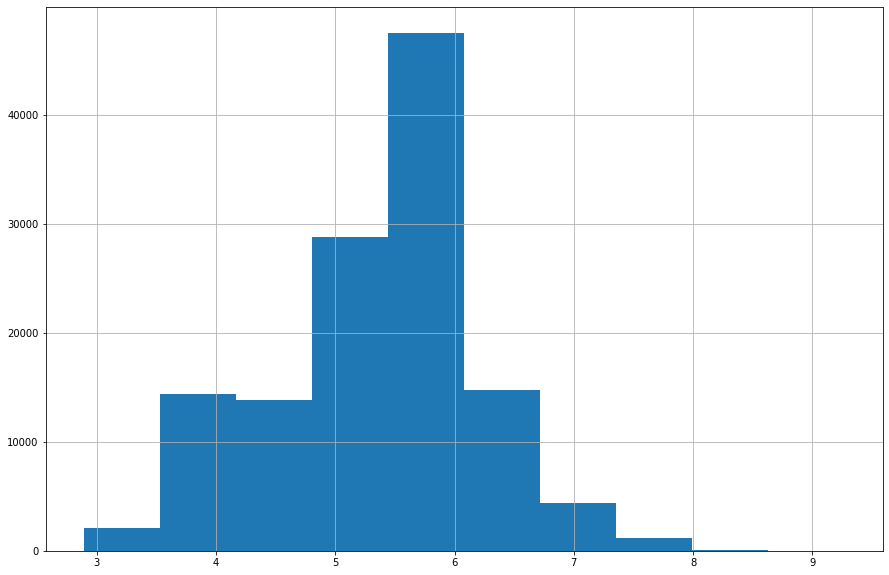

In [485]:
# Visualizando a distribuição da variável 'Valor de Venda' pelo histograma:
combustiveis['Valor de Venda'].hist(bins=10, figsize=(15,10));

In [486]:
# Verificando a assimetria da distribuição da variável 'Valor de Venda':

combustiveis['Valor de Venda'].skew()

-0.2851336003700515

### **Conclusões:**

* Observa-se que a maioria dos dados **estão concentrados entre 5,50 e 6,00 reais.**
* Nota-se que há alguns poucos valores abaixo de 3,00 e acima de 8,00 reais, o que **pode indicar a presença de outliers**, porém não é possível ter certeza. Será necessário confirmar com o sumário estatístico e gráficos do tipo boxplot.
* Quanto à distribuição, esta é do tipo assimetrica à esquerda (skewness negativa), o que indica que o valor da média é menor do que a mediana, que por sua vez será menor que o valor da moda.



### **4.4 - Identificando outliers - estatísticas descritivas**

In [487]:
#Principais estatísticas para a variável 'Valor de Venda' usando a função describe:

combustiveis[['Valor de Venda']].describe()

,Valor de Venda
count,127176.000000
mean,5.355503
std,0.860449
min,2.890000
25%,4.880000
50%,5.490000
75%,5.890000
max,9.270000


### **Conclusões:**

*   A média da distribuição (5,35 reais) embora menor, está muito próxima da mediana (5,49 reais). Porém, não é claro dizer se há alguma influência significativa de outliers sobre essas medidas descritivas.

* Por outro lado, observa-se que **75% dos preços de venda registrados são de até 5,89 reais**, no entanto, **o valor máximo é de 9,27 reais**. Tal informação nos indica que **provavelmente há outliers.**

* Para confirmar tal hipótese, iremos plotar os **gráficos boxplots** a seguir.












### **4.5 - Identificando outliers - Boxplots**

In [488]:
# Primeiramente, utilizaremos o método 'loc' para separar o dataframe nos combustíveis que serão analisados:

#Gasolina Comum
gasolina_comum = combustiveis.loc['GASOLINA']

#Gasolina Aditivada
gasolina_aditivada = combustiveis.loc['GASOLINA ADITIVADA']

#Etanol
etanol = combustiveis.loc['ETANOL']


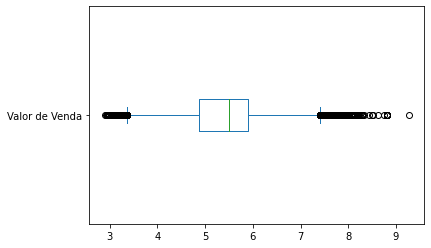

In [489]:
# Boxplot 1: Considerando todos os combustíveis a nível nacional
 
bp1 = pd.DataFrame(combustiveis, columns=["Valor de Venda"])
bp1.plot.box(vert=False);

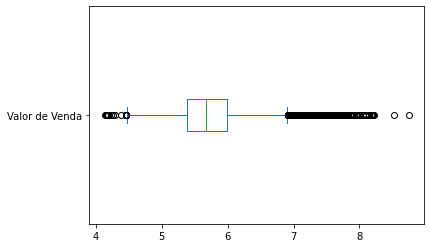

In [490]:
# Boxplot 2 : Considerando apenas os preços da gasolina comum a nível nacional

bp2 = pd.DataFrame(gasolina_comum, columns=["Valor de Venda"])
bp2.plot.box(vert=False);

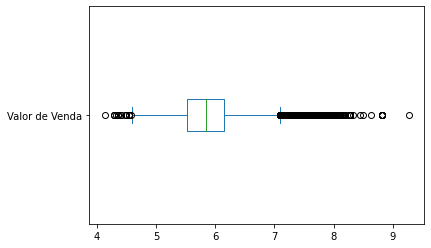

In [491]:
# Boxplot 3: Considerando apenas os preços da gasolina aditivada a nível nacional:

bp3 = pd.DataFrame(gasolina_aditivada, columns=["Valor de Venda"])
bp3.plot.box(vert=False);

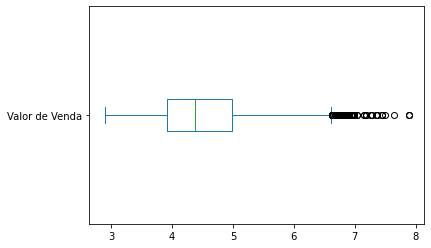

In [492]:
# Boxplot 4: Considerando apenas os preços do etanol a nível nacional:
etanol = combustiveis.loc['ETANOL']
bp4 = pd.DataFrame(etanol, columns=["Valor de Venda"])
bp4.plot.box(vert=False);


### **4.6 - Conclusões iniciais sobre outliers no dataset**

* Como observado,para os combustíveis `gasolina comum` e `gasolina aditivada` há outliers além dos limites inferior e superior do boxplot.

* Para o `etanol` é observado outliers apenas maiores que o limite superior.

* **Dessa forma, para definir se os outliers devem ou não ser retirados definitivamente, iremos seguir o seguinte curso de ação:**


1.  Identificar a quantidade absoluta e percentual dos outliers em relação ao total dos dados;
2. Retirar os outliers e calcular novamente as estatísticas descritivas para identificar o impacto na média, desvio padrão e mediana.









### **4.7 - Calculando a quantidade de outliers moderados e extremos**

In [493]:
#Verificando o Q1, Q2, Q3:
combustiveis.quantile([0.25,0.5,0.75])

,Valor de Venda
0.25,4.88
0.50,5.49
0.75,5.89


In [494]:
# Calculando a Amplitude Interquartil(comprimento da caixa): Q3 -Q1

Amplitude_interquartil = combustiveis.quantile(0.75) - combustiveis.quantile(0.25)
Amplitude_interquartil

Valor de Venda    1.01
dtype: float64

In [495]:
#Outliers moderados 

#Limite Inferior = 4.88 - (1.5 * 1.01) = 3,365
#Limite Superior = 5.89 + (1.5 * 1.01) = 7,405

#Outliers extremos
#Limite Inferior = 4.88 - (3 * 1.01) = 1,85
#Limite Superior = 5.89 + (3 * 1.01) = 8,92

In [496]:
# 3 - Verificando a quantidade de outliers moderados ( absoluto e percentual):

print("{} outliers ".format(len(combustiveis[combustiveis['Valor de Venda'] < 3.37])))
print((len(combustiveis[combustiveis['Valor de Venda'] < 3.37]) / combustiveis.shape[0])*100)

print("{} outliers ".format(len(combustiveis[combustiveis['Valor de Venda'] > 7.40])))
print((len(combustiveis[combustiveis['Valor de Venda'] > 7.40]) / combustiveis.shape[0])*100)


618 outliers 
0.4859407435365163
972 outliers 
0.7642951500283072


In [497]:
# 3 - Verificando a quantidade de outliers extremos ( absoluto e percentual):

print("{} outliers ".format(len(combustiveis[combustiveis['Valor de Venda'] < 1.85])))
print((len(combustiveis[combustiveis['Valor de Venda'] < 1.85]) / combustiveis.shape[0])*100)

print("{} outliers ".format(len(combustiveis[combustiveis['Valor de Venda'] > 8.92])))
print((len(combustiveis[combustiveis['Valor de Venda'] > 8.92]) / combustiveis.shape[0])*100)

0 outliers 
0.0
1 outliers 
0.0007863118827451721


**Conclusão Preliminar:** 

*   Percebe-se que a quantidade absoluta e percentural de outliers moderados e principalmente extremos é muito baixa em relação a todo o conjunto de dados.



### **4.8 - Retirando os outliers moderados**



In [498]:
# Filtrando para obter apenas os valores de venda entre R$3.37 e R$ 7.40:
sem_outliers = combustiveis[(combustiveis['Valor de Venda'] > 3.37) & (combustiveis['Valor de Venda'] < 7.40)]

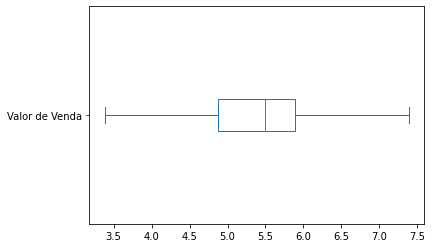

In [499]:
# Novo boxplot sem os outliers:
novo_bp = pd.DataFrame(sem_outliers, columns=["Valor de Venda"])
novo_bp.plot.box(vert=False);

### **4.9 - Calculando novamente as medidas descritivas**

In [500]:
sem_outliers.describe()

,Valor de Venda
count,125483.000000
mean,5.348379
std,0.826192
min,3.380000
25%,4.880000
50%,5.490000
75%,5.890000
max,7.390000


### **4.10- Conclusões finais sobre outliers no dataset**

* Concluí-se que **não é necessário retirar os outliers** uma vez que:

1. A quantidade de outliers total no dataset é de apenas 0,97% (isto é, 1.228 valores no total de 127.176).
2. Com a retirada dos outliers o impacto na média, mediana e desvio padrão não foi significativo:

*   A média com outliers era 5,36 e sem outliers é 5,35;
*  A mediana com e sem outliers é de 5,49;
* O desvio padrão era de 0,86 com outliers e sem outliers é apenas um pouco menor 0,81.





# **5. Análise Exploratória**

**Pergunta 1: Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram um aumento ou diminuição?**

In [501]:
#Brasil - GASOLINA COMUM
gasolina_comum.groupby('Data da Coleta')[['Valor de Venda']].mean().sort_values(['Data da Coleta', 'Valor de Venda'], ascending=True)



,Valor de Venda
Data da Coleta,
2022-07-01,7.173200
2022-07-04,6.612834
2022-07-05,6.611722
2022-07-06,6.392098
2022-07-07,6.222464
2022-07-08,6.152927
2022-07-11,6.130474
2022-07-12,6.123583
2022-07-13,6.016459


In [502]:
#Brasil - GASOLINA ADITIVADA
gasolina_aditivada.groupby('Data da Coleta')[['Valor de Venda']].mean().sort_values(['Data da Coleta', 'Valor de Venda'], ascending=True)


,Valor de Venda
Data da Coleta,
2022-07-01,7.248261
2022-07-04,6.786824
2022-07-05,6.795097
2022-07-06,6.573684
2022-07-07,6.408225
2022-07-08,6.290370
2022-07-11,6.298553
2022-07-12,6.315667
2022-07-13,6.208035


In [503]:
#Brasil - ETANOL
etanol.groupby('Data da Coleta')[['Valor de Venda']].mean().sort_values(['Data da Coleta', 'Valor de Venda'], ascending=True)


,Valor de Venda
Data da Coleta,
2022-07-01,5.395652
2022-07-04,4.879523
2022-07-05,5.158455
2022-07-06,4.944885
2022-07-07,4.820669
2022-07-08,4.753214
2022-07-11,4.842278
2022-07-12,4.928487
2022-07-13,4.659464


(array([738337., 738344., 738351., 738358., 738368., 738375., 738382.,
        738389., 738399.]), <a list of 9 Text major ticklabel objects>)

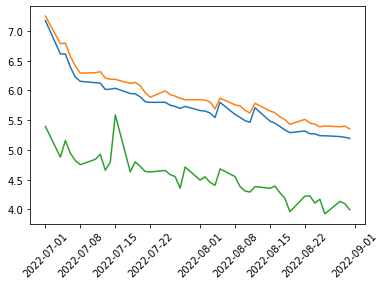

In [504]:
#Gráfico de linha comparando os 3 combustíveis
plt.plot(gasolina_comum.groupby('Data da Coleta')[['Valor de Venda']].mean().sort_values(['Data da Coleta', 'Valor de Venda'], ascending=True), linestyle='-')
plt.plot(gasolina_aditivada.groupby('Data da Coleta')[['Valor de Venda']].mean().sort_values(['Data da Coleta', 'Valor de Venda'], ascending=True))
plt.plot(etanol.groupby('Data da Coleta')[['Valor de Venda']].mean().sort_values(['Data da Coleta', 'Valor de Venda'], ascending=True)
)
plt.xticks(rotation=45)

###Observando o gráfico observa-se que nesse periodo de 2 meses os 3 combustiveis reduziram o seu valor e atingiram seus valores mínimos.

### **Pergunta 2: Qual o preço médio da gasolina e do etanol nesses dois meses?**

In [505]:
# Combustiveis=[['Gasolina comum',gasolina_comum.mean()],['Gasolina Aditivada',gasolina_aditivada.mean()],['Etanol',etanol.mean()]]
# dfCombustiveis = pd.DataFrame(listaCombustiveis, columns=['Combustivel', 'Média'])
# dfCombustiveis




### **Pergunta 3: Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?**

In [506]:
# #Para GASOLINA COMUM

# gasolina_comum = combustiveis.loc['GASOLINA'] 
# plt.ylabel('Valor de Venda')
# plt.xlabel('Estado')
# plt.bar(gasolina_comum.groupby('Estado - Sigla')[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = False).head(), 'bo--')


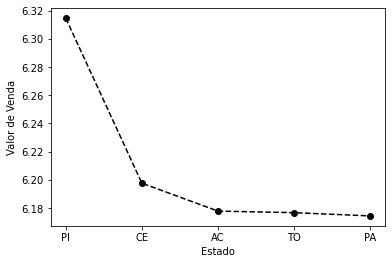

In [507]:
#Para GASOLINA ADITIVADA

gasolina_aditivada = combustiveis.loc['GASOLINA ADITIVADA'] 
plt.ylabel('Valor de Venda')
plt.xlabel('Estado')
plt.plot(gasolina_aditivada.groupby('Estado - Sigla')[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = False).head(), 'ko--')

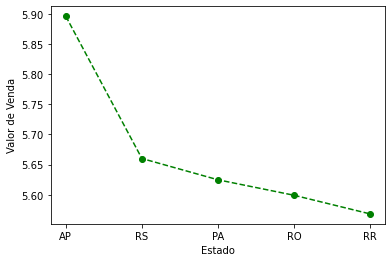

In [508]:
#Para ETANOL

etanol = combustiveis.loc['ETANOL'] 
plt.ylabel('Valor de Venda')
plt.xlabel('Estado')
plt.plot(etanol.groupby('Estado - Sigla')[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = False).head(), 'go--')

<function matplotlib.pyplot.show(*args, **kw)>

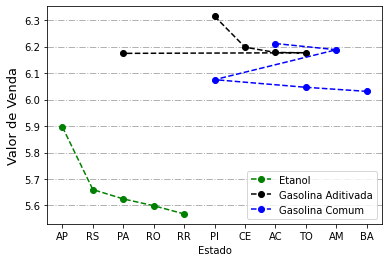

In [509]:
# Os três combustíveis comparados
plt.ylabel('Valor de Venda',fontsize=13)
plt.xlabel('Estado')
axes = plt.gca()
axes.yaxis.grid(color='black', alpha=0.3, linestyle='-.', linewidth=1)
plt.plot(etanol.groupby('Estado - Sigla')[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = False).head(), 'go--', label = 'Etanol')
plt.plot(gasolina_aditivada.groupby('Estado - Sigla')[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = False).head(), 'ko--', label = 'Gasolina Aditivada')
plt.plot(gasolina_comum.groupby('Estado - Sigla')[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = False).head(), 'bo--', label = 'Gasolina Comum')
plt.legend()

plt.show

### **Pergunta 4: Qual o preço médio da gasolina e do etanol por estado?**

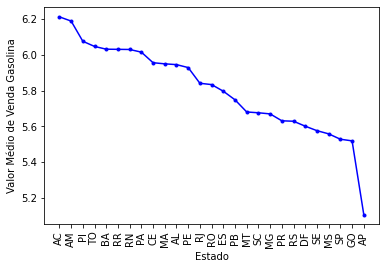

In [510]:
#GASOLINA COMUM
plt.xticks(rotation=90)
plt.ylabel('Valor Médio de Venda Gasolina')
plt.xlabel('Estado')
plt.plot(gasolina_comum.groupby('Estado - Sigla')[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = False), 'bo-', ms=3)

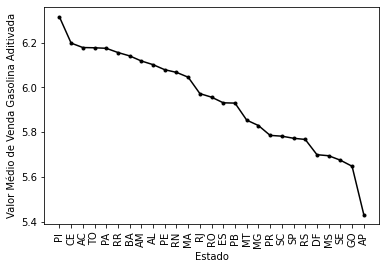

In [511]:
#GASOLINA ADITIVADA
plt.xticks(rotation=90)
plt.ylabel('Valor Médio de Venda Gasolina Aditivada')
plt.xlabel('Estado')
plt.plot(gasolina_aditivada.groupby('Estado - Sigla')[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = False), 'ko-', ms=3)

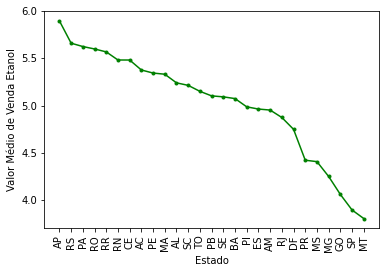

In [512]:
#GASOLINA ETANOL
plt.xticks(rotation=90)
plt.ylabel('Valor Médio de Venda Etanol')
plt.xlabel('Estado')
plt.plot(etanol.groupby('Estado - Sigla')[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = False), 'go-', ms=3)

### **Pergunta 5: Qual o município que possui o menor preço para a gasolina e para o etanol?**

In [513]:
gasolina_comum.groupby(['Produto','Municipio', 'Estado - Sigla'])[['Valor de Venda']].min().sort_values(['Valor de Venda'], ascending = True).head(1)

,,,Valor de Venda
Produto,Municipio,Estado - Sigla,
GASOLINA,PASSO FUNDO,RS,4.13


In [514]:
gasolina_aditivada.groupby(['Produto','Municipio', 'Estado - Sigla'])[['Valor de Venda']].min().sort_values(['Valor de Venda'], ascending = True).head(1)

,,,Valor de Venda
Produto,Municipio,Estado - Sigla,
GASOLINA ADITIVADA,PASSO FUNDO,RS,4.13


In [515]:
etanol.groupby(['Produto','Municipio', 'Estado - Sigla'])[['Valor de Venda']].min().sort_values(['Valor de Venda'], ascending = True).head(1)

,,,Valor de Venda
Produto,Municipio,Estado - Sigla,
ETANOL,PRESIDENTE PRUDENTE,SP,2.89


### **Pergunta 6: Qual o município que possui o maior preço para a gasolina e para o etanol?**

In [516]:
gasolina_comum.groupby(['Produto','Municipio', 'Estado - Sigla'])[['Valor de Venda']].max().sort_values(['Valor de Venda'], ascending = True).head(1)

,,,Valor de Venda
Produto,Municipio,Estado - Sigla,
GASOLINA,SANTANA,AP,5.59


In [517]:
gasolina_aditivada.groupby(['Produto','Municipio', 'Estado - Sigla'])[['Valor de Venda']].max().sort_values(['Valor de Venda'], ascending = True).head(1)

,,,Valor de Venda
Produto,Municipio,Estado - Sigla,
GASOLINA ADITIVADA,SANTANA,AP,5.53


In [518]:
etanol.groupby(['Produto','Municipio', 'Estado - Sigla'])[['Valor de Venda']].max().sort_values(['Valor de Venda'], ascending = True).head(1)

,,,Valor de Venda
Produto,Municipio,Estado - Sigla,
ETANOL,VARZEA GRANDE,MT,3.99


### **Pergunta 7: Qual a região que possui o maior valor médio da gasolina?**

In [519]:
gasolina_comum.groupby(['Produto', 'Regiao - Sigla'])[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = True).head(1)

,,Valor de Venda
Produto,Regiao - Sigla,
GASOLINA,CO,5.581603


In [520]:
gasolina_aditivada.groupby(['Produto', 'Regiao - Sigla'])[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = True).head(1)

,,Valor de Venda
Produto,Regiao - Sigla,
GASOLINA ADITIVADA,CO,5.721266


### **Pergunta 8: Qual a região que possui o menor valor médio do etanol?**

In [521]:
etanol.groupby(['Produto', 'Regiao - Sigla'])[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = True).head(1)

,,Valor de Venda
Produto,Regiao - Sigla,
ETANOL,CO,4.107305


### **Pergunta 9: Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?**

In [522]:
#1 - Fazer uma cópia dos dataframe originais
copia = combustiveis.copy()

In [523]:
# 2 - Valores numéricos para a coluna 'Regiao - Sigla':

nova_regiao = {'N': 1, 'NE': 2, 'CO': 3, 'SE': 4, 'S': 5}
copia['Regiao - Sigla'] = copia['Regiao - Sigla'].map(nova_regiao)

In [524]:
# 3 -Valores numéricos para a coluna 'Estado - Sigla':

novo_estado = {'AC': 1, 'AP': 2, 'AM': 3, 'PA': 4, 'RO': 5, 'RR': 6, 'TO': 7,
               'AL': 8, 'BA': 9, 'CE': 10, 'MA': 11, 'PB': 12, 'PE': 13, 'PI': 14, 'RN': 15, 'SE': 16,
               'DF': 17, 'GO': 18, 'MT': 19, 'MS': 20,
               'ES': 21, 'MG': 22, 'RJ': 23, 'SP': 24,
                'PR': 25, 'SC': 26, 'RS': 27}
copia['Estado - Sigla'] = copia['Estado - Sigla'].map(novo_estado)

In [525]:
#CORRELAÇÃO REGIÕES COM O PREÇO MÉDIO PARA TODOS OS COMBUSTÍVEIS

correlacao = copia[['Valor de Venda', 'Regiao - Sigla', 'Estado - Sigla']].corr()

display(correlacao)

,Valor de Venda,Regiao - Sigla,Estado - Sigla
Valor de Venda,1.000000,-0.211984,-0.257194
Regiao - Sigla,-0.211984,1.000000,0.962110
Estado - Sigla,-0.257194,0.962110,1.000000


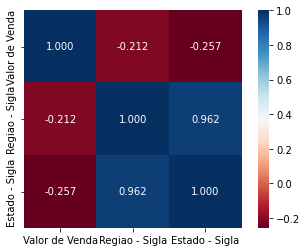

In [526]:
# MAPA DE CALOR (HEATMAP)

sns.heatmap(correlacao, cmap='RdBu', fmt= '.3f', square=True, linecolor='white', annot=True);

In [527]:
# CORRELAÇÃO REGIÕES COM O PREÇO MÉDIO DA GASOLINA COMUM
copia_gasolina_comum = copia.loc["GASOLINA"]
(copia_gasolina_comum.corr())

,Regiao - Sigla,Estado - Sigla,Valor de Venda
Regiao - Sigla,1.000000,0.964520,-0.246763
Estado - Sigla,0.964520,1.000000,-0.274433
Valor de Venda,-0.246763,-0.274433,1.000000


In [528]:
# CORRELAÇÃO REGIÕES COM O PREÇO MÉDIO DA GASOLINA ADITIVADA

copia_gasolina_aditivada = copia.loc["GASOLINA ADITIVADA"]
(copia_gasolina_aditivada.corr())

,Regiao - Sigla,Estado - Sigla,Valor de Venda
Regiao - Sigla,1.000000,0.964308,-0.221464
Estado - Sigla,0.964308,1.000000,-0.237708
Valor de Venda,-0.221464,-0.237708,1.000000


In [529]:
# CORRELAÇÃO REGIÕES COM O PREÇO MÉDIO DO ETANOL 

copia_etanol = copia.loc["ETANOL"]
(copia_etanol.corr())

,Regiao - Sigla,Estado - Sigla,Valor de Venda
Regiao - Sigla,1.000000,0.956833,-0.415766
Estado - Sigla,0.956833,1.000000,-0.509533
Valor de Venda,-0.415766,-0.509533,1.000000


### **Conclusões:**

* Considerando todos os combustíveis, há uma correlação negativa fraca entre o 'Valor de Venda' e as regiões e estados;
* Considerando a gasolina comum e a aditivada, a correlação é do tipo negativa fraca entre 'Valor de Venda' e as regiões e estados;
* Considerando o etanol, observa-se uma correlação negativa moderada entre valor de venda e regiões e estados.



### **Pergunta 10: Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?**

In [530]:
#Valores numéricos para a coluna 'Bandeira':

nova_bandeira = {'VIBRA ENERGIA': 1, 'IPIRANGA': 2, 'BRANCA': 3, 'RAIZEN': 4, 'REJAILE': 5,            
                'RODOIL': 6, "ATEM' S": 7, 'ALESAT':8, 'SP': 9, 'TOTALENERGIES': 10, 'SABBÁ': 11,
                'FEDERAL ENERGIA': 12, 'DISLUB': 13, 'TEMAPE': 14, 'ESTRADA': 15, 'IDAZA': 16, 'STANG': 17,
                'RAIZEN MIME':18, 'PETROX DISTRIBUIDORA':19, 'PETROBAHIA':20, 'TAURUS':21,
                'CIAPETRO':22, 'CHARRUA':23, 'EQUADOR':24, 'SETTA DISTRIBUIDORA':25,
                'MASUT DISTRIBUIDORA':26, 'RIO BRANCO':27, 'RZD DISTRIBUIDORA':28,
                'SUL COMBUSTÍVEIS':29, 'SIMARELLI':30, 'SMALL':31, 'TDC DISTRIBUIDORA':32,
                 'PETROSERRA':33, 'ATLÂNTICA':34, 'FAN':35, 'MAXSUL':36, 'DIBRAPE':37,
                 'WALENDOWSKY':38, 'WATT':39, 'POTENCIAL':40,'ROYAL FIC':41, 'UNI':42,
                 'MONTEPETRO':43, 'TORRAO':44, 'PELIKANO':45, 'AMERICANOIL':46, 'LARCO':47,
                 'RUFF C.J.':48, 'PETRONAC':49}

copia['Bandeira'] = copia['Bandeira'].map(nova_bandeira)


In [531]:
correlacao_2 = copia[['Valor de Venda', 'Regiao - Sigla', 'Estado - Sigla', 'Bandeira']].corr()

display(correlacao_2)

,Valor de Venda,Regiao - Sigla,Estado - Sigla,Bandeira
Valor de Venda,1.000000,-0.211984,-0.257194,0.035793
Regiao - Sigla,-0.211984,1.000000,0.962110,-0.041783
Estado - Sigla,-0.257194,0.962110,1.000000,-0.060139
Bandeira,0.035793,-0.041783,-0.060139,1.000000


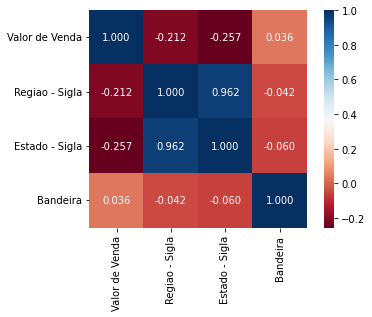

In [532]:
#Mapa de Calor

sns.heatmap(correlacao_2, cmap='RdBu', fmt= '.3f', square=True, linecolor='white', annot=True);

In [533]:
copia_gasolina_comum = copia.loc["GASOLINA"]
(copia_gasolina_comum.corr())

,Regiao - Sigla,Estado - Sigla,Valor de Venda,Bandeira
Regiao - Sigla,1.000000,0.964520,-0.246763,-0.044368
Estado - Sigla,0.964520,1.000000,-0.274433,-0.060835
Valor de Venda,-0.246763,-0.274433,1.000000,0.026223
Bandeira,-0.044368,-0.060835,0.026223,1.000000


In [534]:
copia_gasolina_aditivada = copia.loc["GASOLINA ADITIVADA"]
(copia_gasolina_aditivada.corr())

,Regiao - Sigla,Estado - Sigla,Valor de Venda,Bandeira
Regiao - Sigla,1.000000,0.964308,-0.221464,-0.032504
Estado - Sigla,0.964308,1.000000,-0.237708,-0.058368
Valor de Venda,-0.221464,-0.237708,1.000000,-0.007213
Bandeira,-0.032504,-0.058368,-0.007213,1.000000


In [535]:
copia_etanol = copia.loc["ETANOL"]
(copia_etanol.corr())

,Regiao - Sigla,Estado - Sigla,Valor de Venda,Bandeira
Regiao - Sigla,1.000000,0.956833,-0.415766,-0.048073
Estado - Sigla,0.956833,1.000000,-0.509533,-0.060107
Valor de Venda,-0.415766,-0.509533,1.000000,0.072964
Bandeira,-0.048073,-0.060107,0.072964,1.000000


### **Conclusões:**

* Há uma correlação positiva muito fraca (0.04) entre a bandeira do posto revendedor e o valor de venda de todos os combustíveis.
* Considerando os combustíveis individualmente, se mantém a correlação muito fraca entre o valor de venda e a bandeira:
 - gasolina comum (0.02)
 - gasolina aditivada (0.007)
 - etanol (0.07)

### **1ª Pergunta Extra: Através do coeficiente de variação, explique se as bases de dados utilizadas são mais ou menos homogêneas (Para o Brasil, regiões, estados e municípios).**

### **Para o Brasil como um todo:**

In [536]:
#Coeficiente de Variação - Brasil e todos os combustíveis

c_v=  combustiveis['Valor de Venda'].std() / combustiveis['Valor de Venda'].mean() *100
c_v

16.066638985046218

In [537]:
#Coeficiente de Variação - Brasil - gasolina comum

c_v_comum = gasolina_comum['Valor de Venda'].std()/ gasolina_comum['Valor de Venda'].mean()*100
c_v_comum


9.250824824886084

In [538]:
#Coeficiente de Variação - Brasil - gasolina aditivada
c_v_aditivada = gasolina_aditivada['Valor de Venda'].std()/ gasolina_aditivada['Valor de Venda'].mean()*100
c_v_aditivada

9.292576743788661

In [539]:
#Coeficiente de Variação - Brasil - etanol
c_v_etanol = etanol['Valor de Venda'].std()/ etanol ['Valor de Venda'].mean()*100
c_v_etanol

16.138079939544518

**Conclusão:** 

De acordo com FÁVERO (2017), de forma geral, um coeficiente de varição acima de 30% indicaria um grupo de dados heterogêneo. Dessa forma, considerando todos os combustíveis a nível nacional, a base de dados apresenta variação de no máximo 16%, o que indica um grupo homogêneo, isto é, os dados estão próximos da média.



### **Para as regiões:**

In [540]:
#Coeficiente de Variação - Regiões - todos os combustíveis

media = combustiveis.groupby('Regiao - Sigla')[['Valor de Venda']].mean()
desvio = combustiveis.groupby('Regiao - Sigla')[['Valor de Venda']].std()
c_v_geral = desvio/media*100
c_v_geral.sort_values(by='Valor de Venda', ascending=False)



,Valor de Venda
Regiao - Sigla,
SE,17.535965
CO,17.327910
NE,12.217204
S,11.756365
N,11.304644


In [568]:
# Gráfico de barras:
dict = {"Regiões": ["Sudeste","Centro-Oeste", "Nordeste", "Sul", "Norte"],
       "Coeficiente_Variação_%": [17.535965,17.327910,12.217204,11.756365,11.3046441]}

graf4 = pd.DataFrame(dict)
graf4


,Regiões,Coeficiente_Variação_%
0,Sudeste,17.535965
1,Centro-Oeste,17.327910
2,Nordeste,12.217204
3,Sul,11.756365
4,Norte,11.304644


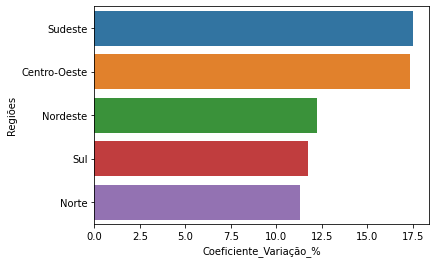

In [569]:
sns.barplot(x ='Coeficiente_Variação_%', y='Regiões', data=graf4)

In [541]:
#Coeficiente de Variação - Regiões - gasolina comum

media = gasolina_comum.groupby('Regiao - Sigla')[['Valor de Venda']].mean()
desvio = gasolina_comum.groupby('Regiao - Sigla')[['Valor de Venda']].std()
c_v_gas_comum = desvio/media*100
c_v_gas_comum.sort_values(by='Valor de Venda', ascending=False)

,Valor de Venda
Regiao - Sigla,
N,10.624768
NE,10.359513
SE,8.216679
CO,8.023869
S,7.701729


In [542]:
#Coeficiente de Variação - Regiões - gasolina aditivada
media = gasolina_aditivada.groupby('Regiao - Sigla')[['Valor de Venda']].mean()
desvio = gasolina_aditivada.groupby('Regiao - Sigla')[['Valor de Venda']].std()
c_v_gas_aditiv = desvio/media*100
c_v_gas_aditiv.sort_values(by='Valor de Venda', ascending=False)

,Valor de Venda
Regiao - Sigla,
NE,10.596536
N,9.254651
SE,8.526369
CO,8.346924
S,7.914083


In [543]:
#Coeficiente de Variação - Regiões - etanol

media = etanol.groupby('Regiao - Sigla')[['Valor de Venda']].mean()
desvio = etanol.groupby('Regiao - Sigla')[['Valor de Venda']].std()
c_v_etanol= desvio/media*100
c_v_etanol.sort_values(by='Valor de Venda', ascending=False)

,Valor de Venda
Regiao - Sigla,
S,14.257374
SE,12.441250
CO,11.221679
N,10.502691
NE,10.003879


**Conclusão:**

*  Em relação às regiões, vale destacar que as regiões sudeste e centro-oeste apresentam a maior variação no grupo de dados, embora ainda sejam considerados como homogêneos (17%);
* Ao desagregarmos os combustíveis, a varição é ainda menor, se destacando apenas a região sul para o etanol, com variação de 14%.



###**Para os estados**

In [544]:
#Estado - todos os combustíveis
media = combustiveis.groupby('Estado - Sigla')[['Valor de Venda']].mean()
desvio = combustiveis.groupby('Estado - Sigla')[['Valor de Venda']].std()
c_v_geral_uf = desvio/media*100
c_v_geral_uf.sort_values(by='Valor de Venda', ascending=False).head(5)

,Valor de Venda
Estado - Sigla,
MT,20.685703
SP,18.833978
GO,16.864779
MG,16.619718
MS,14.483166


In [563]:
#Gráfico de barras:
dict = {"Estado": ["MT", "SP", "GO", "MG","MS"],
       "Coeficiente_Variação_%": [20.685703, 18.833978, 16.864779, 16.619718, 14.483166]}

graf3 = pd.DataFrame(dict) 
graf3


,Estado,Coeficiente_Variação_%
0,MT,20.685703
1,SP,18.833978
2,GO,16.864779
3,MG,16.619718
4,MS,14.483166


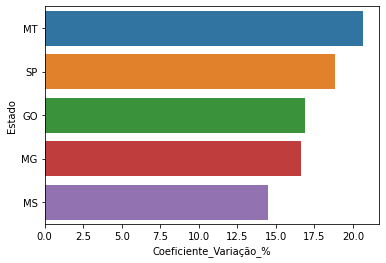

In [564]:
sns.barplot(x ='Coeficiente_Variação_%', y='Estado', data=graf3)

In [545]:
#C.V por estado - gasolina comum

media = gasolina_comum.groupby('Estado - Sigla')[['Valor de Venda']].mean()
desvio = gasolina_comum.groupby('Estado - Sigla')[['Valor de Venda']].std()
c_v_gas_comum_uf = desvio/media*100
c_v_gas_comum_uf.sort_values(by='Valor de Venda', ascending=False)

,Valor de Venda
Estado - Sigla,
MA,11.916335
AM,11.092643
PI,10.620548
PA,10.542780
PE,10.383326
SE,10.275416
CE,10.111934
BA,10.048517
AL,9.790085


In [546]:
#C.V por estado - gasolina aditivada

media = gasolina_aditivada.groupby('Estado - Sigla')[['Valor de Venda']].mean()
desvio = gasolina_aditivada.groupby('Estado - Sigla')[['Valor de Venda']].std()
c_v_gas_aditiv_uf = desvio/media*100
c_v_gas_aditiv_uf.sort_values(by='Valor de Venda', ascending=False)

,Valor de Venda
Estado - Sigla,
MA,11.707368
PI,11.048987
CE,10.590899
SE,10.587070
BA,10.278803
PE,10.200671
PA,10.011888
AL,9.967615
AM,9.786509


In [547]:
#C.V por estado - etanol

media = etanol.groupby('Estado - Sigla')[['Valor de Venda']].mean()
desvio = etanol.groupby('Estado - Sigla')[['Valor de Venda']].std()
c_v_etanol_uf = desvio/media*100
c_v_etanol_uf.sort_values(by='Valor de Venda', ascending=False)

,Valor de Venda
Estado - Sigla,
RS,11.325903
AL,10.587699
PA,10.511673
CE,9.993528
MA,9.979783
DF,9.908963
SC,9.645788
TO,9.471846
RN,9.400804


Conclusão: 
 * Em relação aos estados, destaca-se Mato Grosso e São Paulo, com respectivamente 20,6% e 18,8% de variação. 
 * Quando desagregamos os combustíveis observamos uma variação muito pequena, de no máximo 11% para todos os estados brasileiros.




### **Para municípios:**


In [548]:
#C.V  município - todos os combustíveis

media = combustiveis.groupby(['Municipio','Estado - Sigla'])[['Valor de Venda']].mean()
desvio = combustiveis.groupby(['Municipio','Estado - Sigla'])[['Valor de Venda']].std()
c_v_geral_cidade = desvio/media*100
c_v_geral_cidade.sort_values(by='Valor de Venda', ascending=False)

,,Valor de Venda
Municipio,Estado - Sigla,
JOSE BONIFACIO,SP,23.379239
ADAMANTINA,SP,22.671349
VARZEA GRANDE,MT,22.242778
BARUERI,SP,21.966413
PRESIDENTE PRUDENTE,SP,21.945293
...,...,...
TUBARAO,SC,6.068572
VIDEIRA,SC,5.819172
CONCORDIA,SC,5.641304


In [560]:
#Gráfico de barras

#Criação do dataframe pelo dicionário:

dict = {"Municipio": ["José Bonifácio(SP)","Adamantina(SP)", "Varzea Grande(MT)", "Barueri(SP)","Presidente Prudente(SP)"],
       "Coeficiente_Variação_%": [23.379239,22.671349, 22.242778, 21.966413,21.945293]}

graf2 = pd.DataFrame(dict)
graf2


,Municipio,Coeficiente_Variação_%
0,José Bonifácio(SP),23.379239
1,Adamantina(SP),22.671349
2,Varzea Grande(MT),22.242778
3,Barueri(SP),21.966413
4,Presidente Prudente(SP),21.945293


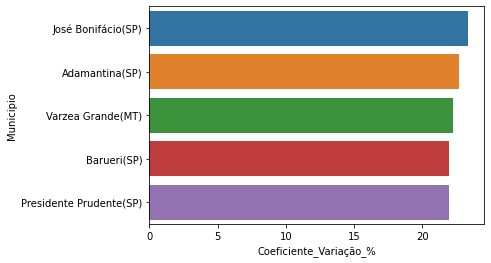

In [562]:
sns.barplot(x ='Coeficiente_Variação_%', y='Municipio', data=graf2)

In [549]:
#C. V município - gasolina comum

media = gasolina_comum.groupby(['Municipio','Estado - Sigla'])[['Valor de Venda']].mean()
desvio = gasolina_comum.groupby(['Municipio','Estado - Sigla'])[['Valor de Venda']].std()
c_v_gas_comum_cidade = desvio/media*100
c_v_gas_comum_cidade.sort_values(by='Valor de Venda', ascending=False)

,,Valor de Venda
Municipio,Estado - Sigla,
BRUMADO,BA,14.119022
CRATO,CE,12.397397
BARREIRAS,BA,12.269886
JAGUAQUARA,BA,12.204785
GOIANA,PE,11.909338
...,...,...
CURVELO,MG,3.329092
ARAGUAINA,TO,3.149427
LAGES,SC,3.028784


In [550]:
#C.V município - gasolina aditivada

media = gasolina_aditivada.groupby(['Municipio','Estado - Sigla'])[['Valor de Venda']].mean()
desvio = gasolina_aditivada.groupby(['Municipio','Estado - Sigla'])[['Valor de Venda']].std()
c_v_gas_aditiv_cidade = desvio/media*100
c_v_gas_aditiv_cidade.sort_values(by='Valor de Venda', ascending=False)

,,Valor de Venda
Municipio,Estado - Sigla,
JAGUAQUARA,BA,19.625397
BRUMADO,BA,14.343222
ADAMANTINA,SP,13.859058
BARUERI,SP,12.617038
CRATO,CE,12.499141
...,...,...
LAGES,SC,3.470843
ARAGUAINA,TO,3.363773
DRACENA,SP,3.150108


In [551]:
#C.V por municipio - etanol

media = etanol.groupby(['Municipio','Estado - Sigla'])[['Valor de Venda']].mean()
desvio = etanol.groupby(['Municipio','Estado - Sigla'])[['Valor de Venda']].std()
c_v_etanol_cidade = desvio/media*100
c_v_etanol_cidade.sort_values(by='Valor de Venda', ascending=False)

,,Valor de Venda
Municipio,Estado - Sigla,
CRUZ ALTA,RS,16.257436
ANANINDEUA,PA,13.130969
LAGES,SC,12.690880
JANAUBA,MG,12.679895
CRICIUMA,SC,12.455950
...,...,...
NOVO HAMBURGO,RS,3.032276
ARAGUAINA,TO,2.725598
SANTANA,AP,0.000000


Conclusão:

*   Corroborando o resultado anterior, quando considerados todos os combustíveis, os 5 municípios que apresentam maior variação, a partir de 20%, estão localizados em São Paulo e Mato Grosso.




### **Para as bandeiras dos postos de revenda**

In [552]:
#c.v - por bandeira - todos os combustíveis.
media = combustiveis.groupby(['Bandeira'])[['Valor de Venda']].mean()
desvio = combustiveis.groupby(['Bandeira'])[['Valor de Venda']].std()
c_v_geral_bandeira = desvio/media*100
c_v_geral_bandeira.sort_values(by='Valor de Venda', ascending=False).head()

,Valor de Venda
Bandeira,
WATT,22.056219
IDAZA,18.252069
ESTRADA,17.878019
RUFF C.J.,17.452541
SIMARELLI,17.195764


In [556]:
# Gráfico de Barras

#Criação do dataframe pelo dicionário:

dict = {"Bandeira": ["WATT", "IDAZA","ESTRADA", "MONTEPETRO", "RUFF C.J."],
       "Coeficiente_Variação_%": [22.056219,18.697353,17.756582,17.688742,17.452541]}

graf1 = pd.DataFrame(dict) 
graf1


,Bandeira,Coeficiente_Variação_%
0,WATT,22.056219
1,IDAZA,18.697353
2,ESTRADA,17.756582
3,MONTEPETRO,17.688742
4,RUFF C.J.,17.452541


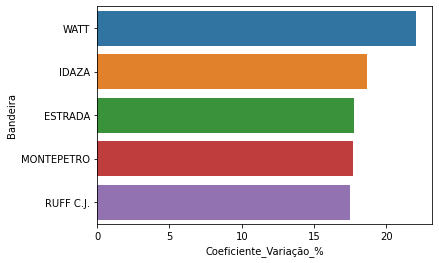

In [559]:
sns.barplot(x ='Coeficiente_Variação_%', y='Bandeira', data=graf1);

In [553]:
#c.v - por bandeira - gasolina comum

media = gasolina_comum.groupby(['Bandeira'])[['Valor de Venda']].mean()
desvio = gasolina_comum.groupby(['Bandeira'])[['Valor de Venda']].std()
c_v_comum_bandeira = desvio/media*100
c_v_comum_bandeira.sort_values(by='Valor de Venda', ascending=False).head()

,Valor de Venda
Bandeira,
PETROBAHIA,12.076275
ESTRADA,11.484333
ATEM' S,11.137720
DISLUB,10.782208
SP,10.528323


In [554]:
#c.v - por bandeira - aditivada

media = gasolina_aditivada.groupby(['Bandeira'])[['Valor de Venda']].mean()
desvio = gasolina_aditivada.groupby(['Bandeira'])[['Valor de Venda']].std()
c_v_aditiv_bandeira = desvio/media*100
c_v_aditiv_bandeira.sort_values(by='Valor de Venda', ascending=False).head()

,Valor de Venda
Bandeira,
WATT,13.613837
PETROBAHIA,13.255943
ATEM' S,10.871444
SP,10.684606
TDC DISTRIBUIDORA,10.632990


In [555]:
#c.v - por bandeira - etanol

media = etanol.groupby(['Bandeira'])[['Valor de Venda']].mean()
desvio = etanol.groupby(['Bandeira'])[['Valor de Venda']].std()
c_v_etanol_bandeira = desvio/media*100
c_v_etanol_bandeira.sort_values(by='Valor de Venda', ascending=False).head()

,Valor de Venda
Bandeira,
BRANCA,16.209188
IPIRANGA,15.997346
VIBRA ENERGIA,15.836188
ALESAT,15.508308
RODOIL,15.228271


### **Conclusões:**



*   Considerando todos os combustíveis, a maior variabilidade de dados foi encontrada nos postos com a bandeira "WATT", com certa de 22% de variação. 
*  De forma geral, como podemos observar, os grupos de dados para combustíveis entre o período de julho e agosto de 2022 são homogêneos, há portanto, uma baixa dispersão dos dados em relação às medidas de tendência central.



###2ª Pergunta Extra: Quais as 5 bandeiras que apresentam o maior preço médio por região? 

### 3ª Pergunta Extra: Quais as 5 bandeiras que apresentam o menor preço médio por região?

### **Conclusões:**

### **6. Conclusões Finais:**

### **7. Referências:**